In [8]:
import xarray as xr
import geopandas as gpd
import regionmask
import numpy as np
import copernicusmarine as cm
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#monthly bottom temp data from copernicus
ds_gl = cm.open_dataset(dataset_id="cmems_mod_glo_phy_my_0.083deg_P1M-m")

INFO - 2024-08-20T18:13:37Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-08-20T18:13:37Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-08-20T18:13:42Z - Service was not specified, the default one was selected: "arco-geo-series"


username:

  lgruenburg1


password:

  ········


In [10]:
bt_gl = ds_gl.bottomT.sel(latitude = slice(30, 48), longitude = slice(-80, -60))

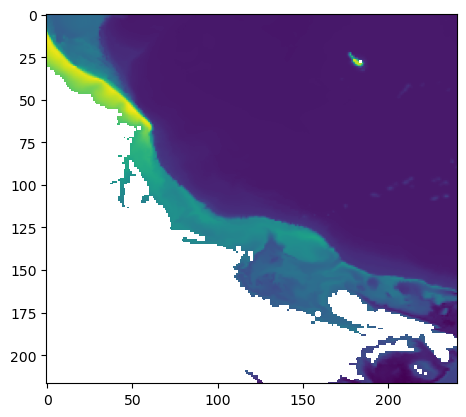

In [11]:
plt.imshow(bt_gl[10,:,:])

In [13]:
strata = gpd.read_file('EcoMon_strata/EcoMon_Strata.shp')

In [15]:
# Get the region of interest
region = regionmask.from_geopandas(strata)

In [16]:
# Create the mask
mask = region.mask(bt_gl.longitude, bt_gl.latitude)

In [ ]:
bt_gl_strata = xr.Dataset(data_vars = {'01': (['time','latitude','longitude'], bt_gl.where(mask == region.numbers[0]))},
                          coords = {'time': bt_gl.time,
                                    'latitude': bt_gl.latitude,
                                    'longitude': bt_gl.longitude})
                                              
for i in np.arange(1, len(region.numbers)):
    masked_ds = bt_gl.where(mask == region.numbers[i])
    strata_bt_gl_n = xr.Dataset(data_vars = {strata.STRATA[i]: (['time','latitude','longitude'], bt_gl.where(mask == region.numbers[i]))},
                          coords = {'time': bt_gl.time,
                                    'latitude': bt_gl.latitude,
                                    'longitude': bt_gl.longitude})
    bt_gl_strata = xr.merge([bt_gl_strata, strata_bt_gl_n])

In [ ]:
# Loop through to get temperature data for each scallop management area in MAB
temp_data_MAB_sma = bottom_temp_data_mom6_SMA_0_MAB
#temp_data_MAB_sma[np.where(np.isnan(temp_data_MAB_sma) == True)] = 0

for i in range(1,12):
    shp = mab_wgs84.geometry[i]
    bottom_temp_data_mom6_SMA_N_MAB = inSHAPE(bt_mom6_smalldomain.lon, bt_mom6_smalldomain.lat, bt_mom6_smalldomain.bt, shp, bt_mom6_smalldomain.time)
    mom6_sma_subsets_mab_n = xr.Dataset(data_vars = {NEWsams_NAMES_MAB[i]: (['time','lat','lon'], bottom_temp_data_mom6_SMA_N_MAB)},
                          coords = {'time': bt_mom6_smalldomain.time,
                                    'lat': bt_mom6_smalldomain.lat,
                                    'lon': bt_mom6_smalldomain.lon})
    mom6_sma_subsets_mab = xr.merge([mom6_sma_subsets_mab, mom6_sma_subsets_mab_n])
    #bottom_temp_data_mom6_SMA_N_MAB[np.where(np.isnan(bottom_temp_data_mom6_SMA_N_MAB) == True)] = 0
    temp_data_MAB_sma = np.nansum([temp_data_MAB_sma, bottom_temp_data_mom6_SMA_N_MAB], axis = 0)

In [ ]:
    
    # Apply mask to the data
    masked_ds = data.where(mask == region.numbers[0])

In [24]:
strata.STRATA[0]

'01'